In [1]:
import pandas as pd
import datetime
import time
from scipy.spatial import distance

In [2]:
test_df = pd.read_csv("../raw_data/202008-citibike-tripdata.csv")

test_df = test_df.drop_duplicates()
test_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2013,2020-08-01 00:00:00.8790,2020-08-01 00:33:34.7260,3295,Central Park W & W 96 St,40.791270,-73.964839,3992,W 169 St & Fort Washington Ave,40.842842,-73.942125,19706,Customer,1998,1
1,7002,2020-08-01 00:00:01.5910,2020-08-01 01:56:44.0720,3144,E 81 St & Park Ave,40.776777,-73.959010,3671,E 81 St & 2 Ave,40.774779,-73.954275,37191,Subscriber,1966,1
2,155,2020-08-01 00:00:03.5810,2020-08-01 00:02:38.6340,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,42561,Customer,1969,0
3,2720,2020-08-01 00:00:05.0130,2020-08-01 00:45:25.3270,3080,S 4 St & Rodney St,40.709340,-73.956080,3364,Carroll St & 5 Ave,40.675162,-73.981483,41607,Subscriber,1990,1
4,2938,2020-08-01 00:00:05.9420,2020-08-01 00:49:03.9640,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,3282,5 Ave & E 88 St,40.783070,-73.959390,36366,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329509,1562,2020-08-31 23:59:29.7690,2020-09-01 00:25:31.9660,298,3 Ave & Schermerhorn St,40.686832,-73.979677,3423,West Drive & Prospect Park West,40.661063,-73.979453,37282,Customer,2001,1
2329510,1023,2020-08-31 23:59:32.1320,2020-09-01 00:16:35.3710,3508,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,3323,W 106 St & Central Park West,40.798186,-73.960591,35088,Customer,1993,2
2329511,600,2020-08-31 23:59:33.0920,2020-09-01 00:09:33.4670,320,Leonard St & Church St,40.717571,-74.005549,380,W 4 St & 7 Ave S,40.734011,-74.002939,36353,Subscriber,2002,1
2329512,737,2020-08-31 23:59:35.7900,2020-09-01 00:11:53.2310,3318,2 Ave & E 96 St,40.783964,-73.947167,3156,E 72 St & York Ave,40.766638,-73.953483,44935,Subscriber,1981,2


In [3]:
test_df["rider_age"] = test_df["birth year"].apply(lambda x: datetime.datetime.now().year - x)


print(test_df["rider_age"].min())
#clear issues with maximum rider age...
print(test_df["rider_age"].max())
test_df = test_df.loc[test_df["rider_age"] <= 80]

#confirm new max age
print(test_df["rider_age"].max())
test_df

16
136
80


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,rider_age
0,2013,2020-08-01 00:00:00.8790,2020-08-01 00:33:34.7260,3295,Central Park W & W 96 St,40.791270,-73.964839,3992,W 169 St & Fort Washington Ave,40.842842,-73.942125,19706,Customer,1998,1,22
1,7002,2020-08-01 00:00:01.5910,2020-08-01 01:56:44.0720,3144,E 81 St & Park Ave,40.776777,-73.959010,3671,E 81 St & 2 Ave,40.774779,-73.954275,37191,Subscriber,1966,1,54
2,155,2020-08-01 00:00:03.5810,2020-08-01 00:02:38.6340,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,42561,Customer,1969,0,51
3,2720,2020-08-01 00:00:05.0130,2020-08-01 00:45:25.3270,3080,S 4 St & Rodney St,40.709340,-73.956080,3364,Carroll St & 5 Ave,40.675162,-73.981483,41607,Subscriber,1990,1,30
4,2938,2020-08-01 00:00:05.9420,2020-08-01 00:49:03.9640,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,3282,5 Ave & E 88 St,40.783070,-73.959390,36366,Customer,1969,0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329509,1562,2020-08-31 23:59:29.7690,2020-09-01 00:25:31.9660,298,3 Ave & Schermerhorn St,40.686832,-73.979677,3423,West Drive & Prospect Park West,40.661063,-73.979453,37282,Customer,2001,1,19
2329510,1023,2020-08-31 23:59:32.1320,2020-09-01 00:16:35.3710,3508,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,3323,W 106 St & Central Park West,40.798186,-73.960591,35088,Customer,1993,2,27
2329511,600,2020-08-31 23:59:33.0920,2020-09-01 00:09:33.4670,320,Leonard St & Church St,40.717571,-74.005549,380,W 4 St & 7 Ave S,40.734011,-74.002939,36353,Subscriber,2002,1,18
2329512,737,2020-08-31 23:59:35.7900,2020-09-01 00:11:53.2310,3318,2 Ave & E 96 St,40.783964,-73.947167,3156,E 72 St & York Ave,40.766638,-73.953483,44935,Subscriber,1981,2,39


In [100]:
test_df["rider_age"].value_counts()

51     311132
30     115559
28     102407
29     100871
31      97806
        ...  
100         3
122         2
106         1
93          1
89          1
Name: rider_age, Length: 109, dtype: int64

In [101]:
rider_ages = test_df["rider_age"].value_counts().sort_index()
rider_ages

16      1121
17      4859
18     11033
19     18404
20     25475
       ...  
131       19
132       82
134        9
135       32
136        4
Name: rider_age, Length: 109, dtype: int64

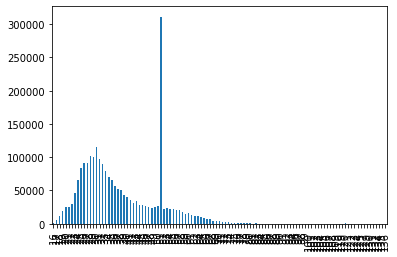

In [102]:
#some issues for data where ages are too high, maybe too many values (duplicates?) for age = 51
#can compare to other data sets from previous months, too
rider_ages.plot(kind="bar")

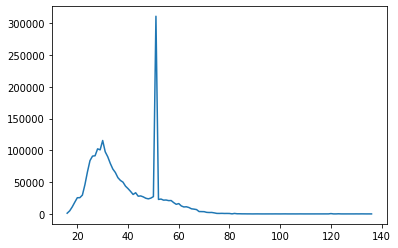

In [103]:
rider_ages.plot()

In [104]:
print(test_df["usertype"].value_counts())

Subscriber    1671914
Customer       657600
Name: usertype, dtype: int64


In [105]:
print(test_df.loc[test_df["rider_age"] == 51]["usertype"].value_counts())

Customer      272417
Subscriber     38715
Name: usertype, dtype: int64


In [106]:
print(test_df.loc[test_df["rider_age"] == 51]["start station name"].value_counts())

12 Ave & W 40 St               2135
West St & Chambers St          1912
Pier 40 - Hudson River Park    1490
West St & Liberty St           1488
Broadway & W 60 St             1486
                               ... 
E 133 St & Cypress Pl             6
Inwood Ave & W 170 St             6
Nelson Ave & W 172 St             4
W 170 St & University Ave         4
Grand Concourse & E 156 St        2
Name: start station name, Length: 1039, dtype: int64


In [107]:
print(test_df.loc[test_df["rider_age"] == 51]["end station name"].value_counts())

12 Ave & W 40 St                 2126
West St & Chambers St            2115
Pier 40 - Hudson River Park      1644
Christopher St & Greenwich St    1549
Broadway & W 60 St               1524
                                 ... 
Grove St PATH                       1
E 153 St & E 157 St                 1
Columbus Dr at Exchange Pl          1
Heights Elevator                    1
Hamilton Park                       1
Name: end station name, Length: 1046, dtype: int64


In [108]:
#test data to get approx. mph over ride duration - may have off values, probably be good to know
check_dist = distance.cdist([[40.719586, -74.043117]], [[40.727596, -74.044247]], 'cityblock')
print(check_dist*69*3600/(384))

def getDist(row):
    start = [row["start station latitude"], row["start station longitude"]]
    end = [row["end station latitude"], row["end station longitude"]]
    sec = row["tripduration"]
    total_coord_dist = distance.cdist([start], [end], 'cityblock')
    return (total_coord_dist*69*3600/(sec))[0][0]

[[5.9124375]]


In [109]:
#add average speed calculated column
test_df["avg_speed"] = test_df.apply(lambda row: getDist(row), axis=1)
test_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,rider_age,avg_speed
0,2013,2020-08-01 00:00:00.8790,2020-08-01 00:33:34.7260,3295,Central Park W & W 96 St,40.791270,-73.964839,3992,W 169 St & Fort Washington Ave,40.842842,-73.942125,19706,Customer,1998,1,22,9.166725
1,7002,2020-08-01 00:00:01.5910,2020-08-01 01:56:44.0720,3144,E 81 St & Park Ave,40.776777,-73.959010,3671,E 81 St & 2 Ave,40.774779,-73.954275,37191,Subscriber,1966,1,54,0.238843
2,155,2020-08-01 00:00:03.5810,2020-08-01 00:02:38.6340,387,Centre St & Chambers St,40.712733,-74.004607,387,Centre St & Chambers St,40.712733,-74.004607,42561,Customer,1969,0,51,0.000000
3,2720,2020-08-01 00:00:05.0130,2020-08-01 00:45:25.3270,3080,S 4 St & Rodney St,40.709340,-73.956080,3364,Carroll St & 5 Ave,40.675162,-73.981483,41607,Subscriber,1990,1,30,5.441147
4,2938,2020-08-01 00:00:05.9420,2020-08-01 00:49:03.9640,3510,Adam Clayton Powell Blvd & W 123 St,40.807832,-73.949373,3282,5 Ave & E 88 St,40.783070,-73.959390,36366,Customer,1969,0,51,2.940437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329509,1562,2020-08-31 23:59:29.7690,2020-09-01 00:25:31.9660,298,3 Ave & Schermerhorn St,40.686832,-73.979677,3423,West Drive & Prospect Park West,40.661063,-73.979453,37282,Customer,2001,1,19,4.133643
2329510,1023,2020-08-31 23:59:32.1320,2020-09-01 00:16:35.3710,3508,St Nicholas Ave & Manhattan Ave,40.809725,-73.953149,3323,W 106 St & Central Park West,40.798186,-73.960591,35088,Customer,1993,2,27,4.608949
2329511,600,2020-08-31 23:59:33.0920,2020-09-01 00:09:33.4670,320,Leonard St & Church St,40.717571,-74.005549,380,W 4 St & 7 Ave S,40.734011,-74.002939,36353,Subscriber,2002,1,18,7.886973
2329512,737,2020-08-31 23:59:35.7900,2020-09-01 00:11:53.2310,3318,2 Ave & E 96 St,40.783964,-73.947167,3156,E 72 St & York Ave,40.766638,-73.953483,44935,Subscriber,1981,2,39,7.968052


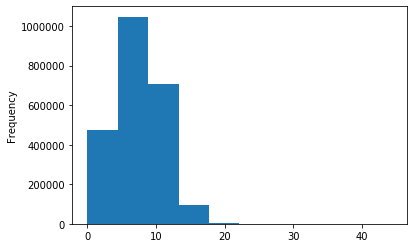

In [110]:
#show bike speed frequency breakdown - 0 just means that it was a round-trip (bike returned to start location)
bike_speeds = test_df["avg_speed"].sort_values()
bike_speeds = bike_speeds.reset_index(drop=True)
bike_speeds.plot(kind="hist")

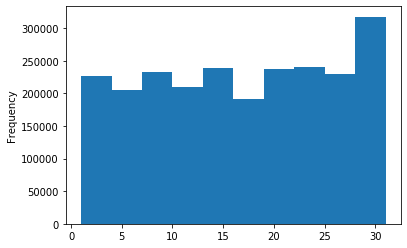

In [111]:
#need to make a histogram showing start times, too
start_times = test_df["starttime"].sort_values()
start_times = start_times.reset_index(drop=True)
plottable_start_times = pd.to_datetime(start_times)
august_time_df = pd.DataFrame({"full_time":plottable_start_times})
august_time_df["day"] = august_time_df["full_time"].map(lambda x: x.day)
august_time_df["day"].plot(kind="hist")

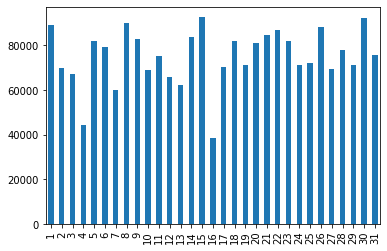

In [112]:
#weekends get more traffic (esp. Saturday) - likely from out of town/recreational use, probably not commuters
day_freq = august_time_df["day"].value_counts()
day_freq = day_freq.sort_index()
day_freq.plot(kind="bar")

In [113]:
#see if the same approximate trends are apparent here, too - like the 51 year old data

test_df_2 = pd.read_csv("../raw_data/202007-citibike-tripdata.csv")

test_df_2

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,341,2020-07-01 00:00:01.3020,2020-07-01 00:05:42.5650,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,33861,Subscriber,1986,1
1,321,2020-07-01 00:00:01.3620,2020-07-01 00:05:22.9490,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,31233,Subscriber,1990,2
2,2710,2020-07-01 00:00:06.6290,2020-07-01 00:45:17.3410,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,40329,Customer,1969,0
3,2685,2020-07-01 00:00:13.0220,2020-07-01 00:44:58.8640,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,17567,Subscriber,1998,1
4,191,2020-07-01 00:00:13.4660,2020-07-01 00:03:24.6230,3615,44 Dr & 21 St,40.748000,-73.946093,3127,9 St & 44 Rd,40.749660,-73.952100,43421,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105803,877,2020-07-31 23:59:48.9250,2020-08-01 00:14:26.2540,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,-73.999979,44073,Customer,1969,0
2105804,839,2020-07-31 23:59:51.7740,2020-08-01 00:13:50.9750,4044,8 Ave & W 38 St,40.754610,-73.991770,3163,Central Park West & W 68 St,40.773407,-73.977825,41797,Customer,2002,1
2105805,1042,2020-07-31 23:59:56.1460,2020-08-01 00:17:18.5090,3723,Cadman Plaza E & Johnson St,40.695317,-73.990157,350,Clinton St & Grand St,40.715595,-73.987030,24808,Subscriber,1974,1
2105806,699,2020-07-31 23:59:57.4310,2020-08-01 00:11:36.5420,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,504,1 Ave & E 16 St,40.732219,-73.981656,41486,Subscriber,1991,1


In [114]:
def getRiderAge(df):
    df["rider_age"] = df["birth year"].apply(lambda x: datetime.datetime.now().year - x)
    
def getAvgSpeed(df):
    df["avg_speed"] = df.apply(lambda row: getDist(row), axis=1)
    
#start to make a cleaning/organizing function for new data frame imports
def addCols(df):
    getRiderAge(df)
    #remove all riders older than about 80 - not really a huge demographic for cylcing anyway
    getAvgSpeed(df)
    
addCols(test_df_2)

print(test_df_2["rider_age"].max())
test_df_2

147


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,rider_age,avg_speed
0,341,2020-07-01 00:00:01.3020,2020-07-01 00:05:42.5650,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,33861,Subscriber,1986,1,34,6.544781
1,321,2020-07-01 00:00:01.3620,2020-07-01 00:05:22.9490,3463,E 16 St & Irving Pl,40.735367,-73.987974,2003,1 Ave & E 18 St,40.733812,-73.980544,31233,Subscriber,1990,2,30,6.952556
2,2710,2020-07-01 00:00:06.6290,2020-07-01 00:45:17.3410,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,40329,Customer,1969,0,51,2.951851
3,2685,2020-07-01 00:00:13.0220,2020-07-01 00:44:58.8640,426,West St & Chambers St,40.717548,-74.013221,212,W 16 St & The High Line,40.743349,-74.006818,17567,Subscriber,1998,1,22,2.979336
4,191,2020-07-01 00:00:13.4660,2020-07-01 00:03:24.6230,3615,44 Dr & 21 St,40.748000,-73.946093,3127,9 St & 44 Rd,40.749660,-73.952100,43421,Subscriber,1992,1,28,9.971504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105803,877,2020-07-31 23:59:48.9250,2020-08-01 00:14:26.2540,217,Old Fulton St,40.702772,-73.993836,398,Atlantic Ave & Furman St,40.691652,-73.999979,44073,Customer,1969,0,51,4.889348
2105804,839,2020-07-31 23:59:51.7740,2020-08-01 00:13:50.9750,4044,8 Ave & W 38 St,40.754610,-73.991770,3163,Central Park West & W 68 St,40.773407,-73.977825,41797,Customer,2002,1,18,9.693575
2105805,1042,2020-07-31 23:59:56.1460,2020-08-01 00:17:18.5090,3723,Cadman Plaza E & Johnson St,40.695317,-73.990157,350,Clinton St & Grand St,40.715595,-73.987030,24808,Subscriber,1974,1,46,5.579598
2105806,699,2020-07-31 23:59:57.4310,2020-08-01 00:11:36.5420,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,504,1 Ave & E 16 St,40.732219,-73.981656,41486,Subscriber,1991,1,29,6.927844


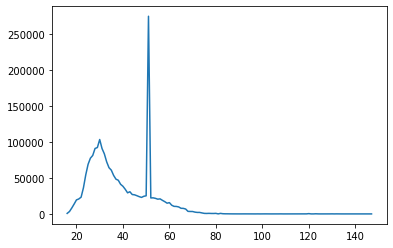

In [115]:
#can see the same sort of chart, apparently there are a lot of 51 year olds that use this?
rider_ages2 = test_df_2["rider_age"].value_counts().sort_index()
rider_ages2.plot()